In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/CodingDojo/04-DataViz/Week15/Data/zillow_home_values-zipcode.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0,...,261945.0,267644.0,273946.0,280066.0,285121.0,288532.0,290458.0,291103.0,292081.0,292948.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222569.0,...,453150.0,464727.0,478369.0,489712.0,497173.0,499429.0,497572.0,498113.0,500187.0,503109.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90009.0,...,177319.0,179463.0,182812.0,186403.0,189836.0,192064.0,193760.0,195140.0,196787.0,198137.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,188096.0,...,570211.0,572145.0,573662.0,576469.0,578706.0,580834.0,581779.0,584566.0,588188.0,590722.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275983.0,...,752025.0,757734.0,760336.0,766163.0,771443.0,776607.0,779281.0,782367.0,788211.0,793924.0


In [5]:
metadata_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']
date_cols = [col for col in df.columns if col not in metadata_cols]
df_long = df.melt(
    id_vars=metadata_cols,
    value_vars=date_cols,
    var_name="Date",
    value_name="Home Value" )
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%d%m%Y', errors='coerce')
invalid_dates = df_long['Date'].isna().sum()
if invalid_dates > 0:
    print(f"Warning: {invalid_dates} rows have invalid date formats. They will be dropped.")
df_long = df_long.dropna(subset=['Date'])
df_long.set_index('Date', inplace=True)
print(df_long.head())

            RegionID  SizeRank  RegionName RegionType StateName State  \
Date                                                                    
2000-01-31     91940         0       77449        zip        TX    TX   
2000-01-31     91982         1       77494        zip        TX    TX   
2000-01-31     93144         2       79936        zip        TX    TX   
2000-01-31     62080         3       11368        zip        NY    NY   
2000-01-31     62093         4       11385        zip        NY    NY   

                City                                  Metro        CountyName  \
Date                                                                            
2000-01-31       NaN   Houston-The Woodlands-Sugar Land, TX     Harris County   
2000-01-31       NaN   Houston-The Woodlands-Sugar Land, TX  Fort Bend County   
2000-01-31   El Paso                            El Paso, TX    El Paso County   
2000-01-31  New York  New York-Newark-Jersey City, NY-NJ-PA     Queens County   
20

This structure is ideal for time-series analysis as the Date index facilitates resampling, filtering, and plotting based on time.

In [6]:
states_to_keep = ['CA', 'WA', 'OR', 'AZ', 'NV']
start_date = '2010-01-01'
end_date = '2020-12-31'
filtered_df = df_long[
    (df_long['State'].isin(states_to_keep)) &
    (df_long.index >= start_date) &
    (df_long.index <= end_date)]
output_path = "filtered_home_values_for_tableau.csv"
filtered_df.reset_index().to_csv(output_path, index=False)
print(f"Filtered data saved to {output_path}")

Filtered data saved to filtered_home_values_for_tableau.csv


In [7]:
import os
output_dir = "Data"
output_file = "data-for-tableau.csv"
output_path = os.path.join(output_dir, output_file)
os.makedirs(output_dir, exist_ok=True)
filtered_df.reset_index().to_csv(output_path, index=False)
print(f"Filtered data saved to {output_path}")

Filtered data saved to Data/data-for-tableau.csv


In [8]:
yearly_home_values = (
    filtered_df
    .groupby('State')['Home Value']
    .resample('Y')
    .mean()
    .reset_index())
yearly_home_values['Date'] = yearly_home_values['Date'].dt.year
print(yearly_home_values.head())

  State  Date     Home Value
0    AZ  2010  169930.889076
1    AZ  2011  152272.467002
2    AZ  2012  159902.057789
3    AZ  2013  183657.225403
4    AZ  2014  198551.492521


<ipython-input-8-ca14b2fcc7e7>:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample('Y')


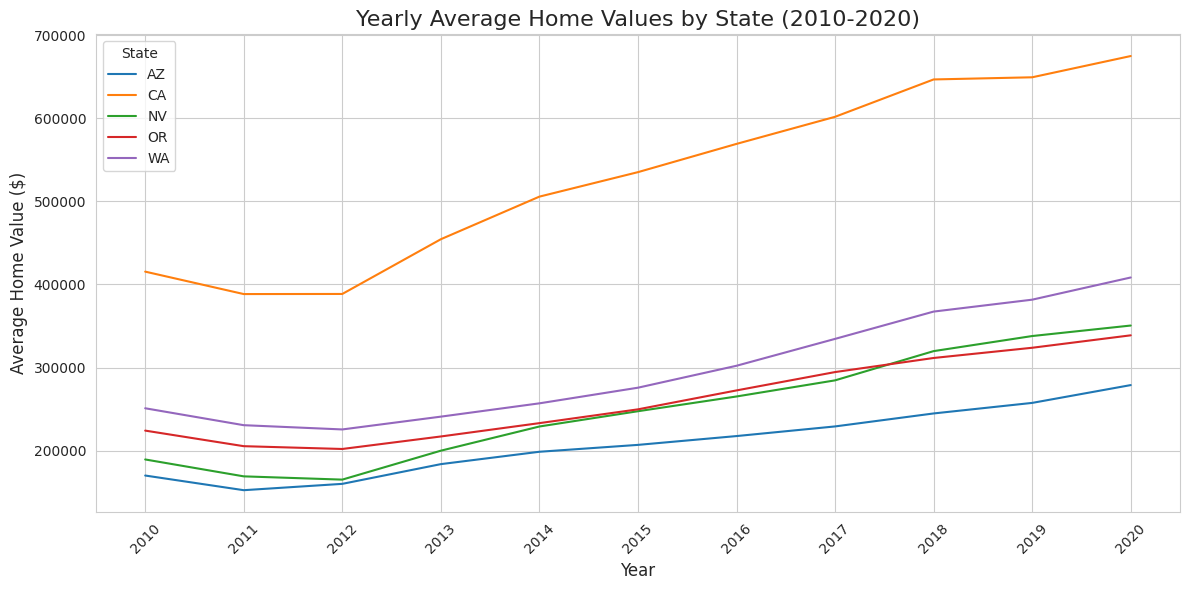

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
for state in yearly_home_values['State'].unique():
    state_data = yearly_home_values[yearly_home_values['State'] == state]
    plt.plot(state_data['Date'], state_data['Home Value'], label=state)
plt.title("Yearly Average Home Values by State (2010-2020)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Home Value ($)", fontsize=12)
plt.legend(title="State", loc="upper left", fontsize=10)
plt.xticks(yearly_home_values['Date'].unique(), rotation=45)
plt.tight_layout()
plt.show()

The graph will display:

- X-axis: Years from 2010 to 2020.
- Y-axis: Average home values.
- Lines: One line for each state (CA, WA, OR, AZ, NV).

In [10]:
import pandas as pd
file_path = "/content/filtered_home_values_for_tableau.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
oregon_data = df[
    (df['State'] == 'OR') &
    (df.index >= '2000-01-31') &
    (df.index <= '2018-12-31')]
oregon_monthly_mean = oregon_data['Home Value'].resample('M').mean()
print(oregon_monthly_mean.head())

Date
2010-01-31    230596.438095
2010-02-28    229565.085443
2010-03-31    229221.670886
2010-04-30    228979.212698
2010-05-31    227928.262658
Freq: ME, Name: Home Value, dtype: float64


<ipython-input-10-c12b90718f9f>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  oregon_monthly_mean = oregon_data['Home Value'].resample('M').mean()


In [11]:
null_count = oregon_monthly_mean.isnull().sum()
print(f"Number of null values: {null_count}")
if null_count > 0:
    oregon_monthly_mean = oregon_monthly_mean.interpolate(method='linear')
    null_count_after = oregon_monthly_mean.isnull().sum()
    print(f"Number of null values after interpolation: {null_count_after}")

Number of null values: 0


- The code will first print the number of null values.
- If any nulls are found, they are interpolated, and the count of nulls is printed again to confirm the issue is resolved.

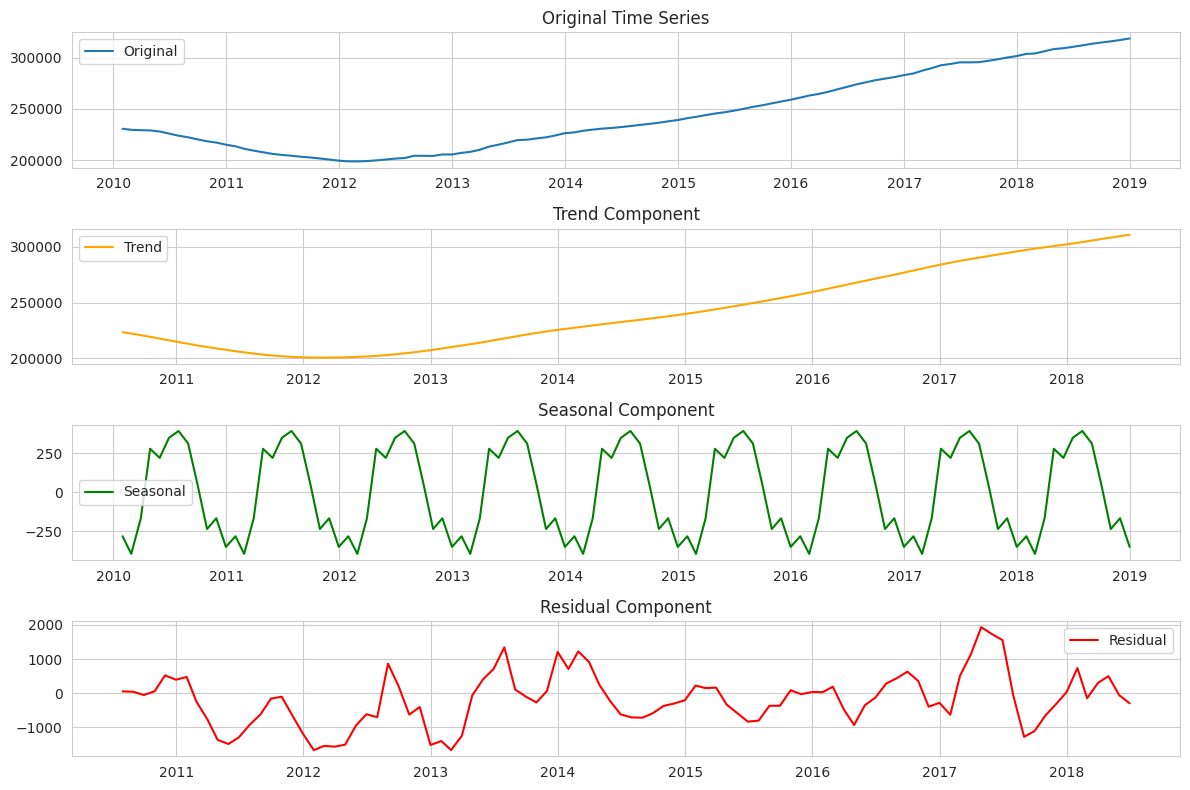

In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
decomposition = sm.tsa.seasonal_decompose(oregon_monthly_mean, model='additive')
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(oregon_monthly_mean, label='Original')
plt.title('Original Time Series')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual Component')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

ADF Statistic: -1.1619564597393437
P-value: 0.6897433613903905
The series is non-stationary (p-value >= 0.05). Differencing may be required.


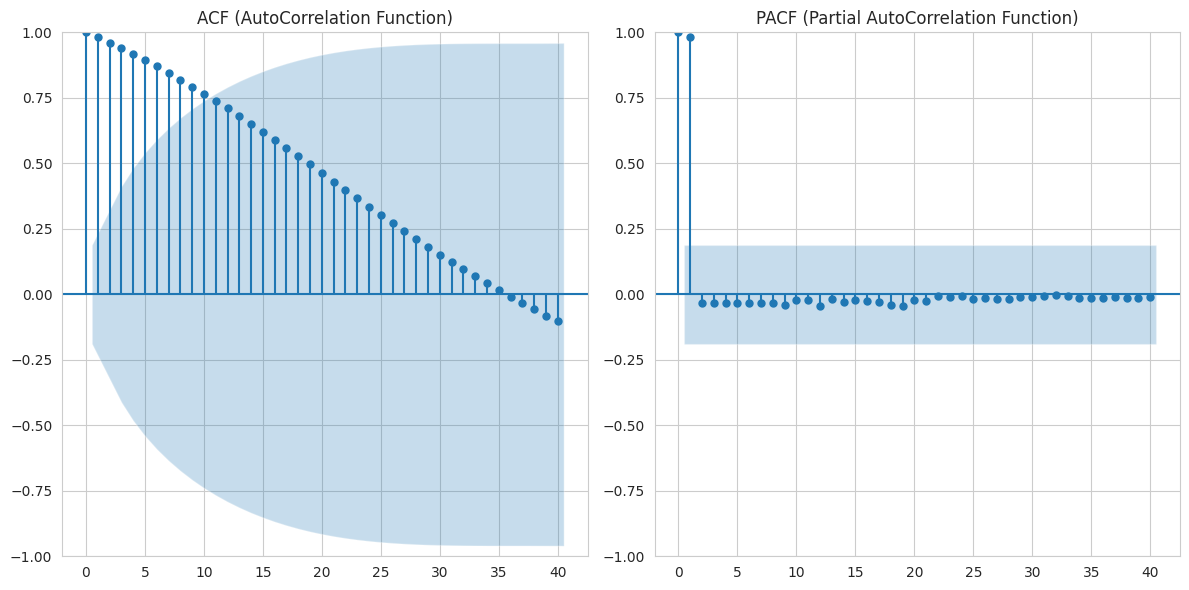

In [13]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
adf_result = adfuller(oregon_monthly_mean.dropna())
adf_stat = adf_result[0]
p_value = adf_result[1]
print(f"ADF Statistic: {adf_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("The series is stationary (p-value < 0.05). No differencing needed.")
else:
    print("The series is non-stationary (p-value >= 0.05). Differencing may be required.")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(oregon_monthly_mean.dropna(), lags=40, ax=plt.gca())
plt.title("ACF (AutoCorrelation Function)")
plt.subplot(122)
plot_pacf(oregon_monthly_mean.dropna(), lags=40, ax=plt.gca())
plt.title("PACF (Partial AutoCorrelation Function)")
plt.tight_layout()
plt.show()

In [14]:
p = 1
q = 1
print(f"Initial AR order (p): {p}")
print(f"Initial MA order (q): {q}")
print(f"Seasonal AR order (P): 1")
print(f"Seasonal MA order (Q): 1")
print(f"Seasonal period: 12 months")

Initial AR order (p): 1
Initial MA order (q): 1
Seasonal AR order (P): 1
Seasonal MA order (Q): 1
Seasonal period: 12 months


Training Data: Date
2010-01-31    230596.438095
2010-02-28    229565.085443
2010-03-31    229221.670886
2010-04-30    228979.212698
2010-05-31    227928.262658
Freq: ME, Name: Home Value, dtype: float64
Test Data: Date
2018-01-31    303915.116766
2018-02-28    304362.766962
2018-03-31    306535.796460
2018-04-30    308659.562130
2018-05-31    309487.658824
Freq: ME, Name: Home Value, dtype: float64


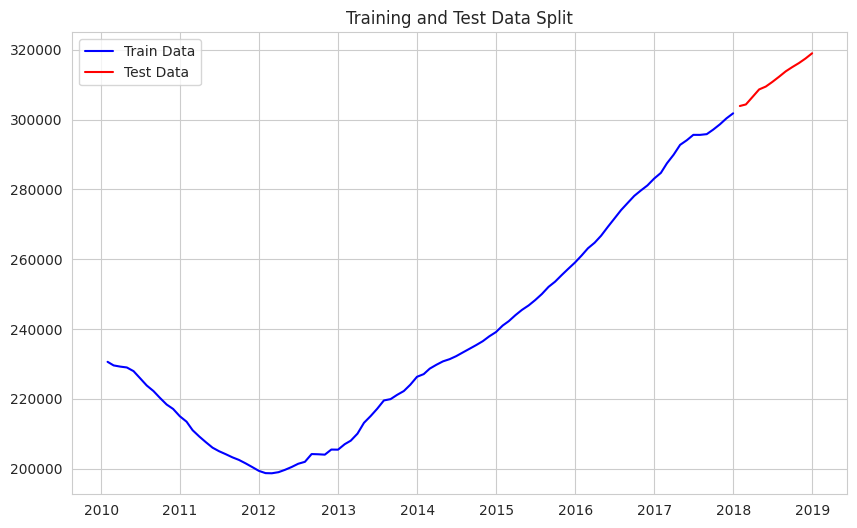

In [15]:
train_data = oregon_monthly_mean['2000-01-31':'2017-12-31']
test_data = oregon_monthly_mean['2018-01-31':'2018-12-31']
print(f"Training Data: {train_data.head()}")
print(f"Test Data: {test_data.head()}")
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data', color='blue')
plt.plot(test_data, label='Test Data', color='red')
plt.title("Training and Test Data Split")
plt.legend(loc='best')
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                         Home Value   No. Observations:                   96
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -562.176
Date:                            Sat, 21 Dec 2024   AIC                           1134.353
Time:                                    23:40:14   BIC                           1145.524
Sample:                                01-31-2010   HQIC                          1138.785
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8509      0.072     11.790      0.000       0.709       0.992
ma.L1         -0.1137      0.094   

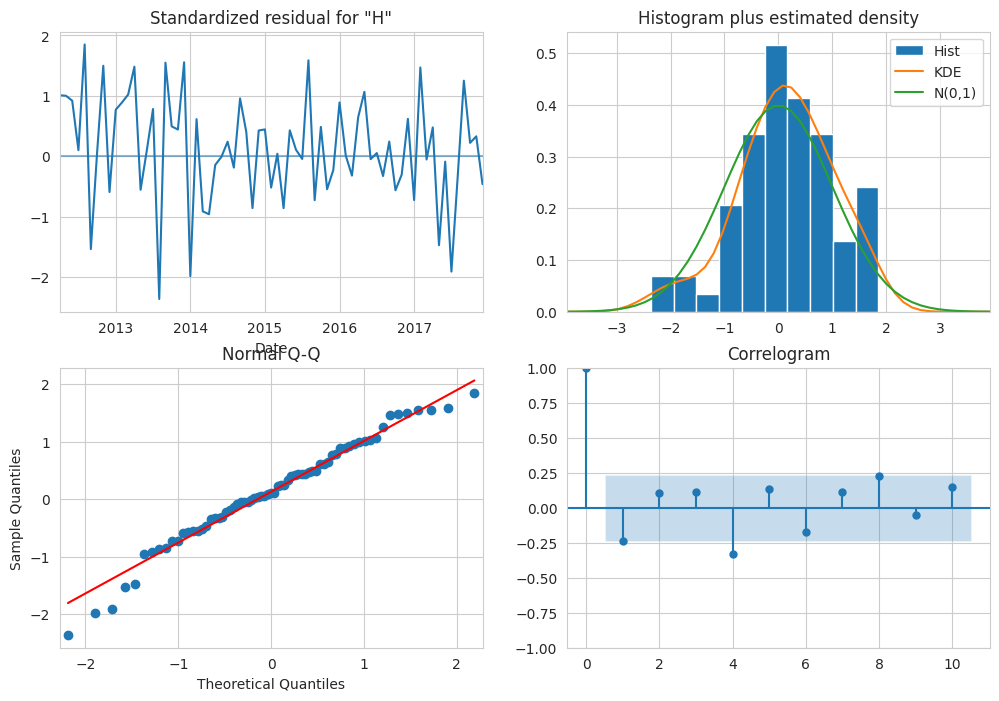

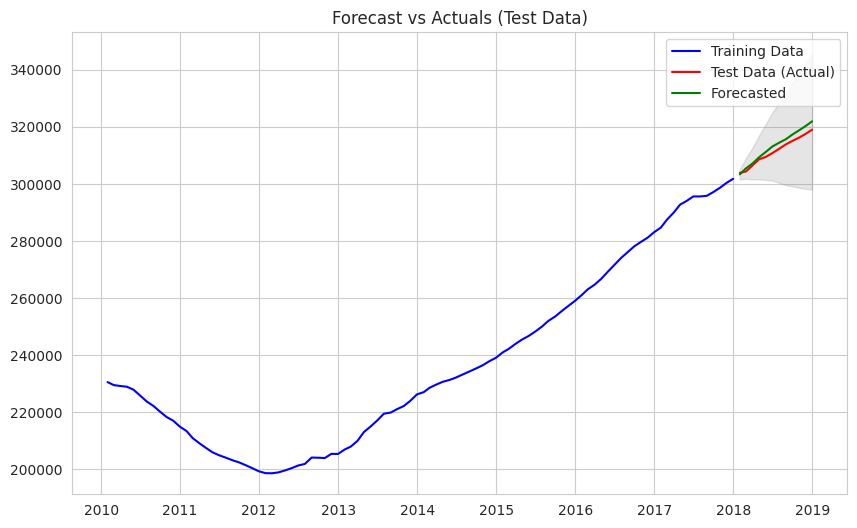

Root Mean Squared Error (RMSE): 1964.845506266783
Mean Absolute Error (MAE): 1790.0411681562498


In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
model = SARIMAX(train_data,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
sarima_model = model.fit(disp=False)
print(sarima_model.summary())
sarima_model.plot_diagnostics(figsize=(12, 8))
plt.show()
forecast = sarima_model.get_forecast(steps=12)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Test Data (Actual)', color='red')
plt.plot(forecast_values.index, forecast_values, label='Forecasted', color='green')
plt.fill_between(forecast_values.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1],
                 color='gray', alpha=0.2)
plt.title('Forecast vs Actuals (Test Data)')
plt.legend(loc='best')
plt.show()
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
mae = mean_absolute_error(test_data, forecast_values)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

In [17]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=1508.861, Time=3.88 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1499.727, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1501.384, Time=0.21 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1501.549, Time=0.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1500.263, Time=0.65 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1506.272, Time=0.64 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1498.657, Time=4.84 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(2,0,1)[12]             : AIC=1500.536, Time=6.18 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(1,0,2)[12]             : AIC=1511.418, Time=2.99 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(0,0,2)[12]             : AIC=1504.752, Time=0.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(2,0,0)[12]             : AIC=1502.196, Time=0.27 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(2,0,2)[12]             : AIC=inf, Time=10.72 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(1,0,1)[12]             : AIC=1499.483, Time=1.93 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(1,0,1)[12]             : AIC=1498.626, Time=3.39 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(1,0,0)[12]             : AIC=1501.573, Time=1.01 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(2,0,1)[12]             : AIC=1500.499, Time=1.22 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(1,0,2)[12]             : AIC=1501.495, Time=0.76 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1499.663, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,2)[12]             : AIC=1501.773, Time=1.90 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(2,0,0)[12]             : AIC=1501.834, Time=1.77 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(2,0,2)[12]             : AIC=inf, Time=3.68 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(1,0,1)[12]             : AIC=1501.376, Time=0.58 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(1,0,1)[12]             : AIC=1501.036, Time=0.34 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(1,0,1)[12]             : AIC=1503.348, Time=0.56 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(1,0,1)[12] intercept   : AIC=1500.539, Time=0.83 sec

Best model:  ARIMA(0,2,1)(1,0,1)[12]          
Total fit time: 49.322 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(0, 2, 1)x(1, 0, 1, 12)   Log Likelihood                -745.313
Date:                            Sat, 21 Dec 2024   AIC                           1498.626
Time:                                    23:41:11   BIC                           1508.800
Sample:                                01-31-2010   HQIC                          1502.736
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

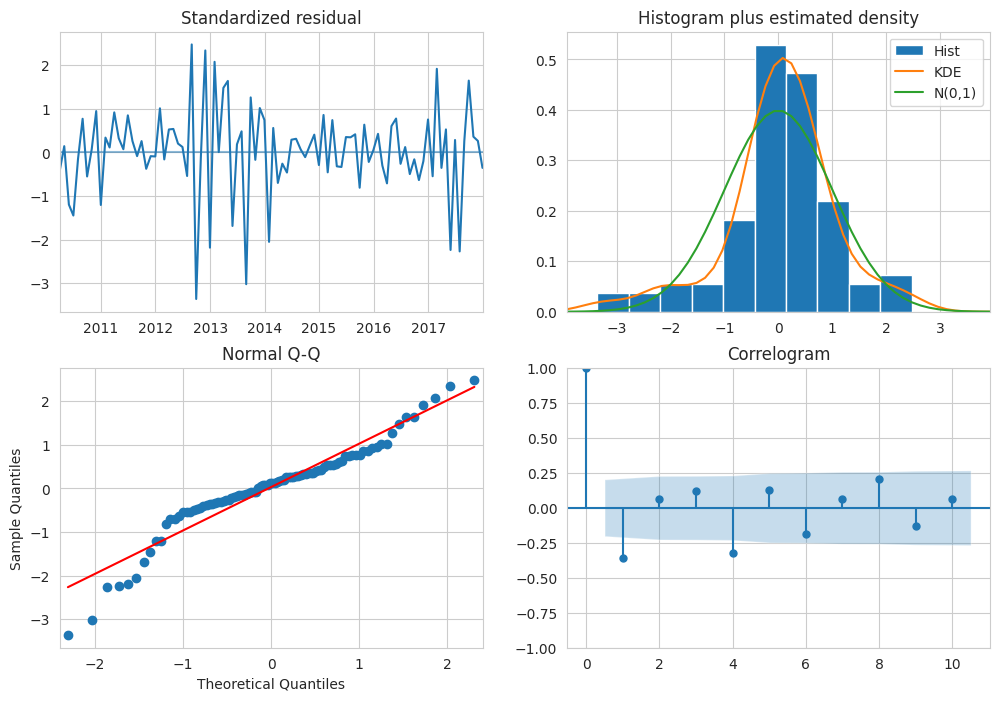

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-18-2f65d71c3df5>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start='2018-01-31', periods=12, freq='M')


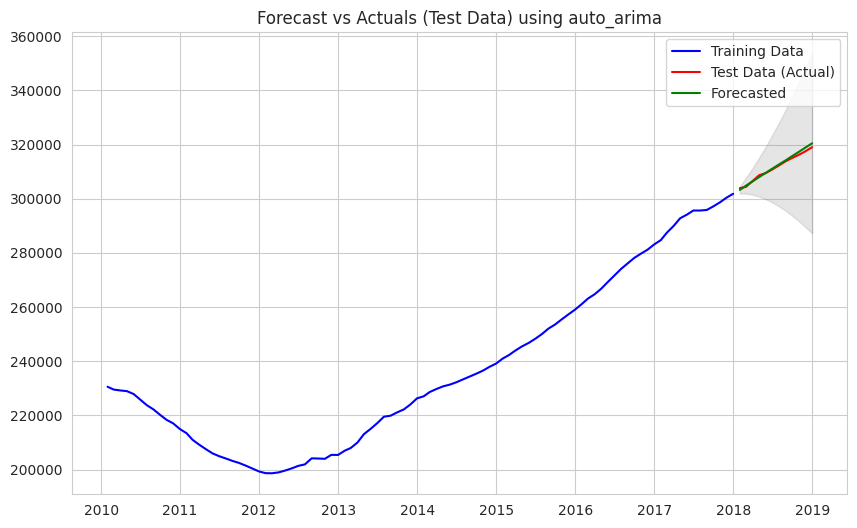

Root Mean Squared Error (RMSE): 766.0425084248221
Mean Absolute Error (MAE): 628.3384239859928


In [18]:
import pmdarima as pm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
auto_model = pm.auto_arima(train_data,
                           seasonal=True,
                           m=12,
                           trace=True,
                           suppress_warnings=True,
                           stepwise=True)
print(auto_model.summary())
auto_model.plot_diagnostics(figsize=(12, 8))
plt.show()
forecast_values, conf_int = auto_model.predict(n_periods=12, return_conf_int=True)
forecast_index = pd.date_range(start='2018-01-31', periods=12, freq='M')
forecast_series = pd.Series(forecast_values, index=forecast_index)
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Test Data (Actual)', color='red')
plt.plot(forecast_series, label='Forecasted', color='green')
plt.fill_between(forecast_series.index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='gray', alpha=0.2)
plt.title('Forecast vs Actuals (Test Data) using auto_arima')
plt.legend(loc='best')
plt.show()
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
mae = mean_absolute_error(test_data, forecast_values)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

-
The SARIMAX model appears to be a reasonable choice for your time series data, especially if it exhibits both seasonality and autoregressive behavior.

- The SARIMAX model seems well-suited for this time series data, particularly given its ability to handle seasonality and temporal dependencies.
- The statistically significant coefficients for the AR(1) and seasonal AR(12) terms suggest these components are crucial for the model.
- Although the model fits the data fairly well, there is still room for improvement (e.g., by refining or removing the seasonal MA term, or comparing with simpler models like ARIMA).

https://public.tableau.com/shared/5XFF32KDM?:display_count=n&:origin=viz_share_link# Tableau Workbook